In [45]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import random

%matplotlib inline

In [46]:
# Loading the dataset and separate into training/test and X/y
data = pd.read_csv("creditcard.csv")
x_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

print (data.shape)
print (x_data.shape)
print (y_data.shape)

print (x_data)

(284807, 31)
(284807, 30)
(284807,)
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999 

# Visualizing the feature space
---
We're going to better understand the features and find out which features contribute to detecting fraud.

Number of normal classes: 284315
Number of fraud classes: 492


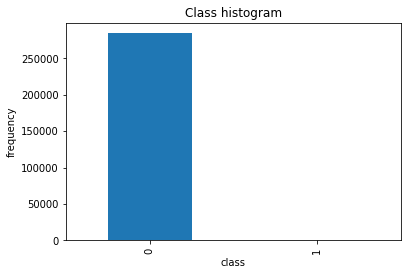

In [47]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
normal_classes = count_classes[0]
fraud_classes = count_classes[1]

print ("Number of normal classes: %d" %(normal_classes))
print ("Number of fraud classes: %d" %(fraud_classes))
mp.title("Class histogram")
mp.xlabel("class")
mp.ylabel("frequency")

As you can see the data set is very skewed towards non-fraud classes

### Let's try visualizing the cases of fraud and its features

In [48]:
#Time data is most likely not useful at all
# Let's drop the amount column, and create its own comparison
x_data = x_data.drop('Time', 1)
x_data = x_data.drop('Amount', 1)

x_data_part_one = x_data.drop('V15', 1).drop('V16', 1).drop('V17', 1) \
    .drop('V18', 1).drop('V19', 1).drop('V20', 1).drop('V21', 1) \
    .drop('V22', 1).drop('V23', 1).drop('V24', 1).drop('V25', 1) \
    .drop('V26', 1).drop('V27', 1).drop('V28', 1)

x_data_part_two = x_data.drop('V1', 1).drop('V2', 1).drop('V3', 1) \
    .drop('V4', 1).drop('V5', 1).drop('V6', 1).drop('V7', 1) \
    .drop('V8', 1).drop('V9', 1).drop('V10', 1).drop('V11', 1) \
    .drop('V12', 1).drop('V13', 1).drop('V14', 1)


In [49]:
# Function to plot all features of normal (max 1000 random)/fraud rows
def plot_features(x_data, is_fraud):
    exs = y_data.loc[y_data == is_fraud]
    if (exs.shape[0] > 1000):
        exs = exs.head(1000)
    mp.figure(figsize=(10, 10))
    for ex in range(exs.shape[0]):
        case = x_data.iloc[exs.index[ex]]
        case.plot(kind = 'line')

We're going to be plotting each set of features: V1-V14 and V15-V28 for both fraud cases and normal cases. We do this to see if there's any notable patterns in the significance of certain features to indicate fraudulent transactions.

### Plot of features V1-V14 of fraud cases

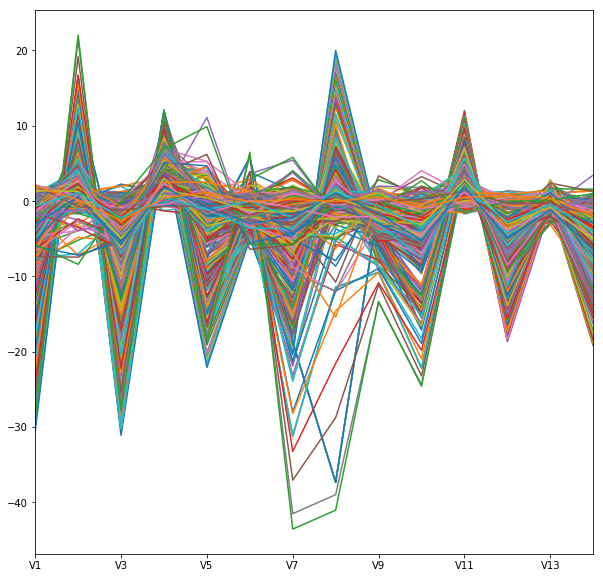

In [50]:
# Plot all the fraud case features in two plots (V1-V14, V15-V28)
plot_features(x_data_part_one, 1)

### Plot of features V1-V14 of normal cases

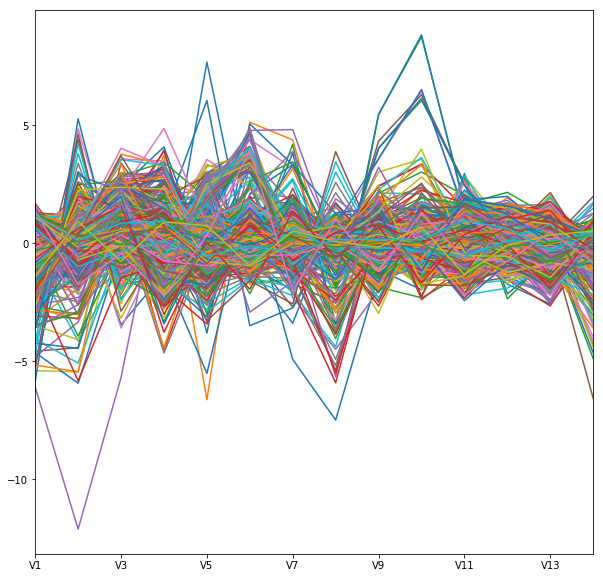

In [51]:
plot_features(x_data_part_one, 0)

### Plot of features V15-V28 of fraud cases

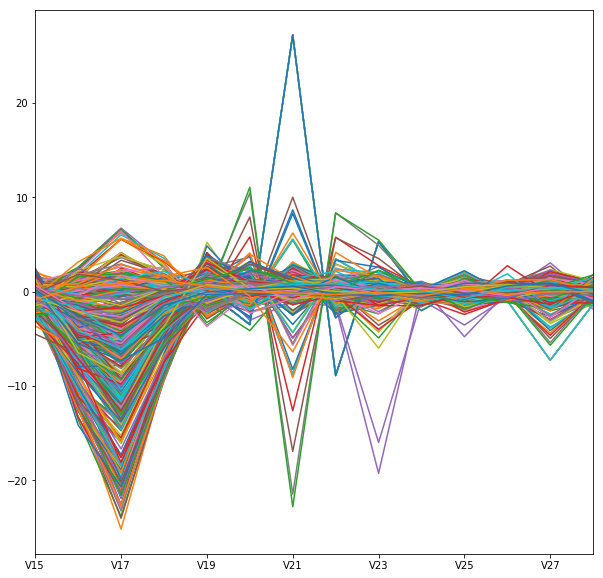

In [52]:
plot_features(x_data_part_two, 1)

### Plot of features V15-V28 of normal cases

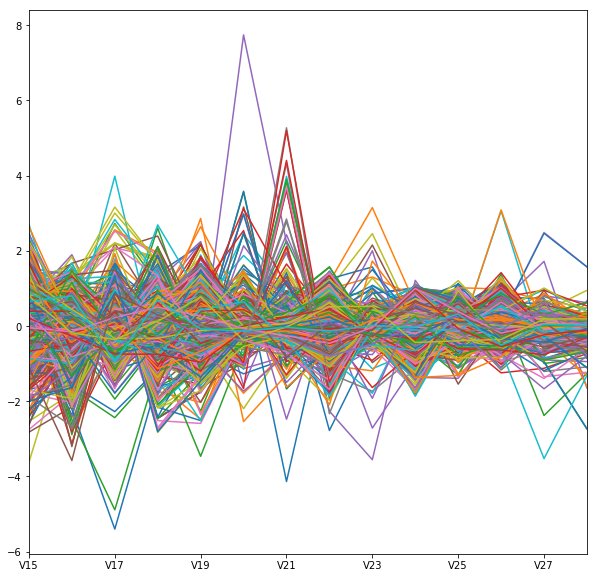

In [53]:
plot_features(x_data_part_two, 0)

We see that there are several key features in indicating that a transaction are fradulent: **V1**, **V2**, **V3**, **V4**, **V5**, **V7**, **V8**, **V10**, **V11**, **V12**, **V17**

# TODO
- Use logistic regression with under-sampling to predict on selected features above